##**Title:** *Stroke Risk Prediction and Web-Based Health Assessment System Using Machine Learning*

**Problem Statement:**

Stroke remains one of the leading causes of death and disability worldwide, yet many high-risk individuals are unaware of their risk until it is too late to take preventive action. Early identification of stroke risk can greatly improve medical outcomes by allowing timely lifestyle changes or clinical intervention.

This project aims to develop a **machine learning-powered stroke risk prediction system** using a dataset containing demographic, clinical, and lifestyle variables (e.g., age, blood pressure, family history, glucose levels, stress levels, BMI, and more). The solution will involve building a predictive model that classifies individuals based on their likelihood of experiencing a stroke.

In addition to model development, the project will also include the creation of a **web-based interface** where users can input their health and lifestyle information and instantly receive a stroke risk prediction. This system will be implemented using Python for machine learning and a lightweight web framework such as Streamlit or FastAPI for deployment. The goal is to demonstrate both data science and full-stack integration skills by connecting model insights to a user-friendly application.

**Objectives:**

1. Perform data cleaning, exploratory data analysis (EDA), and feature engineering on the stroke dataset.
2. Train and evaluate multiple machine learning models to determine the most accurate classifier.
3. Interpret key contributing factors to stroke risk using model explainability techniques.
4. Build and deploy a web application that integrates the trained ML model into an interactive user interface.
5. Provide insights and recommendations based on the analysis to support early stroke risk awareness.

**Expected Outcome:**

A functional machine learning model with strong predictive performance, accompanied by a deployed web application that offers an accessible stroke risk assessment tool. The project will showcase applied skills in data analysis, machine learning, model deployment, and practical problem-solving.

**Problem Statement Summary:** Develop a web-based Stroke Risk Prediction System that uses machine learning to estimate a patient’s likelihood of experiencing a stroke based on demographic, clinical, and lifestyle data. The system will include a trained ML model, an API for model inference, and a simple frontend that allows users to input health data and receive a prediction with an explanation.

##Data Cleaning

In [1]:
#load the dataset
import pandas as pd

df = pd.read_csv('/content/stroke_prediction_dataset.csv')

df.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [2]:
#get the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

In [3]:
df.describe(include ='all')

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
count,15000.000000,15000,15000.000000,15000,15000.000000,15000.000000,15000,15000,15000,15000.000000,...,15000,15000,15000.000000,15000,15000,15000.000000,15000,15000,12500,15000
unique,NaN,13818,NaN,2,NaN,NaN,3,4,2,NaN,...,4,3,NaN,2,7,NaN,4458,5952,5786,2
top,NaN,Anika Sachdeva,NaN,Male,NaN,NaN,Single,Private,Rural,NaN,...,Rarely,High,NaN,Yes,Paleo,NaN,96/70,"HDL: 50, LDL: 185",Difficulty Speaking,No Stroke
freq,NaN,4,NaN,7622,NaN,NaN,5156,3863,7529,NaN,...,3821,5060,NaN,7592,2192,NaN,14,9,268,7532
mean,49715.802867,NaN,54.035667,NaN,0.249000,0.502933,NaN,NaN,NaN,129.445209,...,NaN,NaN,0.500267,NaN,NaN,5.022694,NaN,NaN,NaN,NaN
std,29000.656642,NaN,21.063111,NaN,0.432448,0.500008,NaN,NaN,NaN,40.487792,...,NaN,NaN,0.500017,NaN,NaN,2.873223,NaN,NaN,NaN,NaN
min,1.000000,NaN,18.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,60.000000,...,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,24562.000000,NaN,36.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,94.517500,...,NaN,NaN,0.000000,NaN,NaN,2.540000,NaN,NaN,NaN,NaN
50%,49448.000000,NaN,54.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,128.900000,...,NaN,NaN,1.000000,NaN,NaN,5.050000,NaN,NaN,NaN,NaN
75%,75112.000000,NaN,72.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,164.592500,...,NaN,NaN,1.000000,NaN,NaN,7.520000,NaN,NaN,NaN,NaN


In [4]:
#get the summary statistics of the dataset
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df.describe(include ='all')

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
count,15000.000000,15000,15000.000000,15000,15000.000000,15000.000000,15000,15000,15000,15000.000000,15000.000000,15000,15000,15000,15000.000000,15000,15000,15000.000000,15000,15000,12500,15000
unique,NaN,13818,NaN,2,NaN,NaN,3,4,2,NaN,NaN,3,4,3,NaN,2,7,NaN,4458,5952,5786,2
top,NaN,Anika Sachdeva,NaN,Male,NaN,NaN,Single,Private,Rural,NaN,NaN,Currently Smokes,Rarely,High,NaN,Yes,Paleo,NaN,96/70,"HDL: 50, LDL: 185",Difficulty Speaking,No Stroke
freq,NaN,4,NaN,7622,NaN,NaN,5156,3863,7529,NaN,NaN,5011,3821,5060,NaN,7592,2192,NaN,14,9,268,7532
mean,49715.802867,NaN,54.035667,NaN,0.249000,0.502933,NaN,NaN,NaN,129.445209,27.474302,NaN,NaN,NaN,0.500267,NaN,NaN,5.022694,NaN,NaN,NaN,NaN
std,29000.656642,NaN,21.063111,NaN,0.432448,0.500008,NaN,NaN,NaN,40.487792,7.230201,NaN,NaN,NaN,0.500017,NaN,NaN,2.873223,NaN,NaN,NaN,NaN
min,1.000000,NaN,18.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,60.000000,15.010000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,24562.000000,NaN,36.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,94.517500,21.160000,NaN,NaN,NaN,0.000000,NaN,NaN,2.540000,NaN,NaN,NaN,NaN
50%,49448.000000,NaN,54.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,128.900000,27.420000,NaN,NaN,NaN,1.000000,NaN,NaN,5.050000,NaN,NaN,NaN,NaN
75%,75112.000000,NaN,72.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,164.592500,33.720000,NaN,NaN,NaN,1.000000,NaN,NaN,7.520000,NaN,NaN,NaN,NaN


In [5]:
#get the summary statistics of the dataset
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df.describe(include ='all')

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
count,15000.000000,15000,15000.000000,15000,15000.000000,15000.000000,15000,15000,15000,15000.000000,15000.000000,15000,15000,15000,15000.000000,15000,15000,15000.000000,15000,15000,12500,15000
unique,NaN,13818,NaN,2,NaN,NaN,3,4,2,NaN,NaN,3,4,3,NaN,2,7,NaN,4458,5952,5786,2
top,NaN,Anika Sachdeva,NaN,Male,NaN,NaN,Single,Private,Rural,NaN,NaN,Currently Smokes,Rarely,High,NaN,Yes,Paleo,NaN,96/70,"HDL: 50, LDL: 185",Difficulty Speaking,No Stroke
freq,NaN,4,NaN,7622,NaN,NaN,5156,3863,7529,NaN,NaN,5011,3821,5060,NaN,7592,2192,NaN,14,9,268,7532
mean,49715.802867,NaN,54.035667,NaN,0.249000,0.502933,NaN,NaN,NaN,129.445209,27.474302,NaN,NaN,NaN,0.500267,NaN,NaN,5.022694,NaN,NaN,NaN,NaN
std,29000.656642,NaN,21.063111,NaN,0.432448,0.500008,NaN,NaN,NaN,40.487792,7.230201,NaN,NaN,NaN,0.500017,NaN,NaN,2.873223,NaN,NaN,NaN,NaN
min,1.000000,NaN,18.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,60.000000,15.010000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,24562.000000,NaN,36.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,94.517500,21.160000,NaN,NaN,NaN,0.000000,NaN,NaN,2.540000,NaN,NaN,NaN,NaN
50%,49448.000000,NaN,54.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,128.900000,27.420000,NaN,NaN,NaN,1.000000,NaN,NaN,5.050000,NaN,NaN,NaN,NaN
75%,75112.000000,NaN,72.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,164.592500,33.720000,NaN,NaN,NaN,1.000000,NaN,NaN,7.520000,NaN,NaN,NaN,NaN


In [6]:
#check for missing values
df.isnull().sum()

,0
Patient ID,0
Patient Name,0
Age,0
Gender,0
Hypertension,0
Heart Disease,0
Marital Status,0
Work Type,0
Residence Type,0
Average Glucose Level,0


In [7]:
#Fill missing values
df['Symptoms'] = df['Symptoms'].fillna('None')

In [8]:
df.isnull().sum()

,0
Patient ID,0
Patient Name,0
Age,0
Gender,0
Hypertension,0
Heart Disease,0
Marital Status,0
Work Type,0
Residence Type,0
Average Glucose Level,0


In [9]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
df = df.drop(['Patient ID','Patient Name'], axis= 1)

df = df.drop(columns=["Hypertension"])


In [11]:
df.head()

,Age,Gender,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,56,Male,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,80,Male,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,26,Male,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,73,Male,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,51,Male,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [12]:
#  Split Blood Pressure Levels
bp_split = df['Blood Pressure Levels'].str.split('/', expand=True)
df['Systolic_BP'] = pd.to_numeric(bp_split[0])
df['Diastolic_BP'] = pd.to_numeric(bp_split[1])
df = df.drop('Blood Pressure Levels', axis=1)

In [13]:
#  Split Cholesterol Levels
chol_split = df['Cholesterol Levels'].str.extract(r'HDL:\s*(\d+),\s*LDL:\s*(\d+)')
df['HDL'] = pd.to_numeric(chol_split[0])
df['LDL'] = pd.to_numeric(chol_split[1])
df = df.drop('Cholesterol Levels', axis=1)

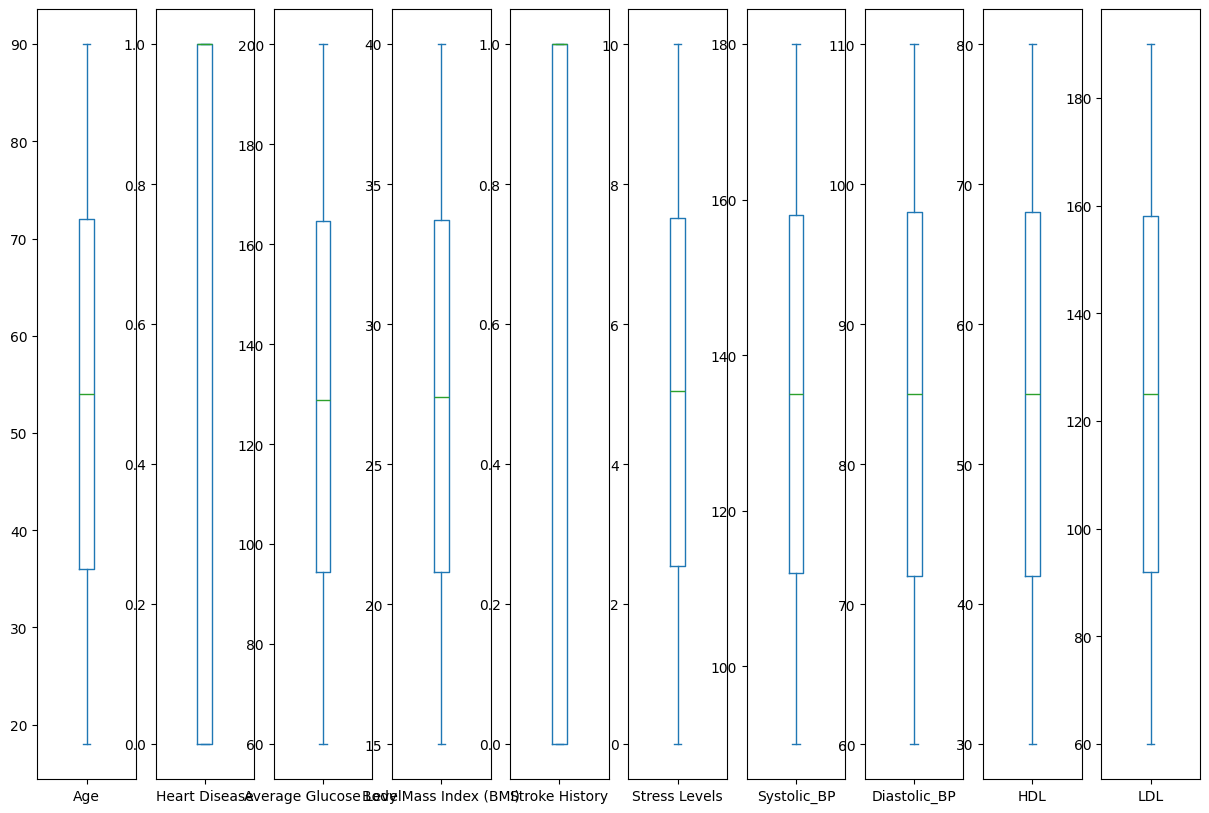

In [14]:
# check for outliers by plotting box plots
import matplotlib.pyplot as plt
df.plot(kind='box', subplots=True, figsize=(15,10))
plt.show()

In [15]:
# Clip outliers
import numpy as np
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    df[col] = np.clip(df[col], q1 - 1.5*iqr, q3 + 1.5*iqr)

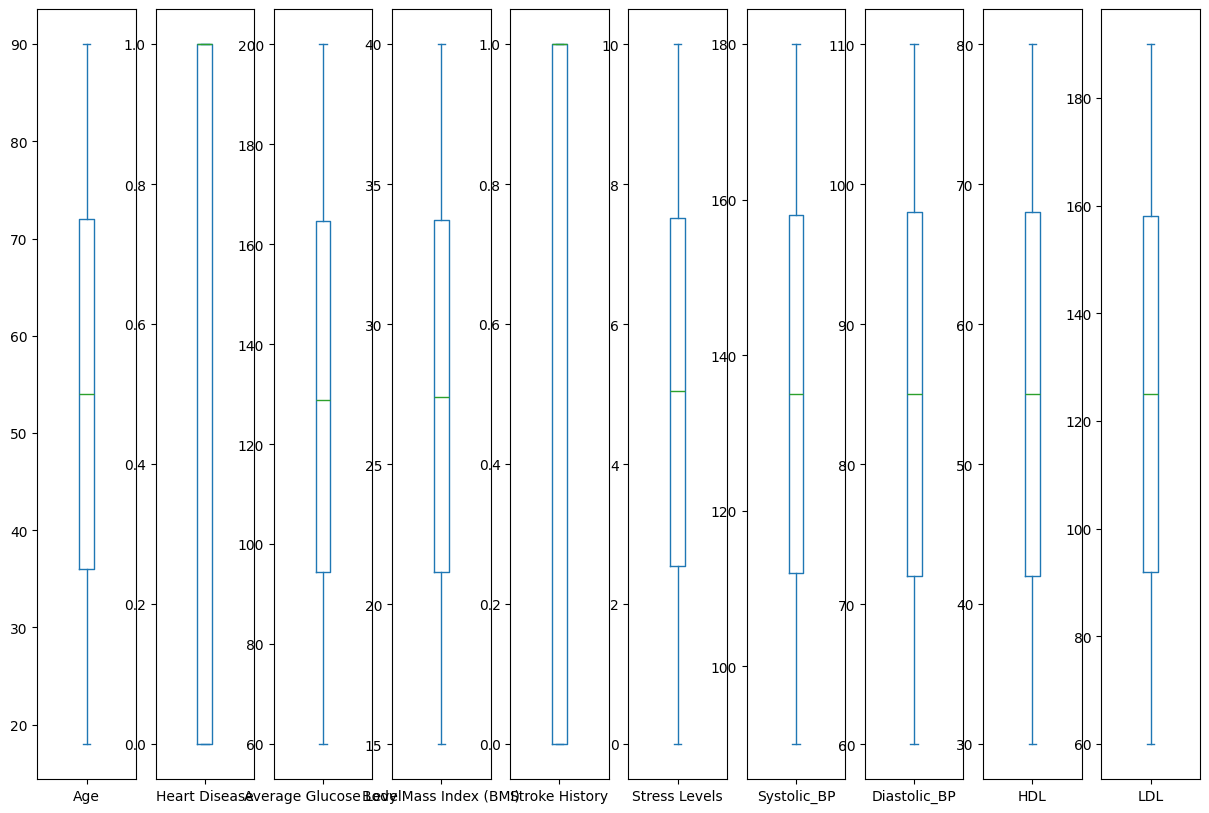

In [16]:
# check for outliers by plotting box plots
import matplotlib.pyplot as plt
df.plot(kind='box', subplots=True, figsize=(15,10))
plt.show()

In [17]:
# Target variable distribution
df['Stroke History'].value_counts(normalize=True)

,proportion
Stroke History,
1,0.500267
0,0.499733


In [18]:
df['Age'].head()

,Age
0,56
1,80
2,26
3,73
4,51


##Exploratory Data Analysis (EDA)

###Univariate Analysis

Goal: Understand each column individually

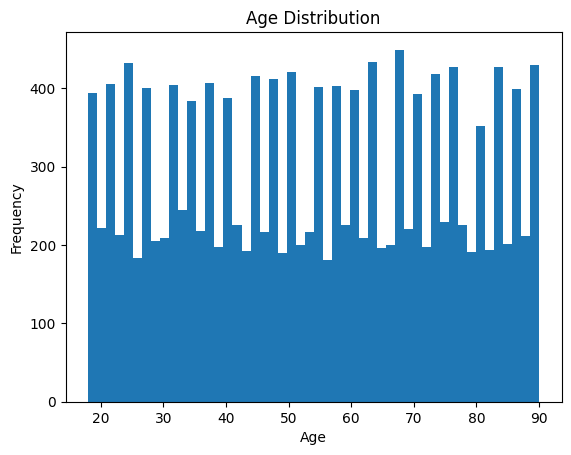

In [19]:
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins = 50)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The data appears to be relatively uniform, meaning that all age groups within the range have a similar frequency.

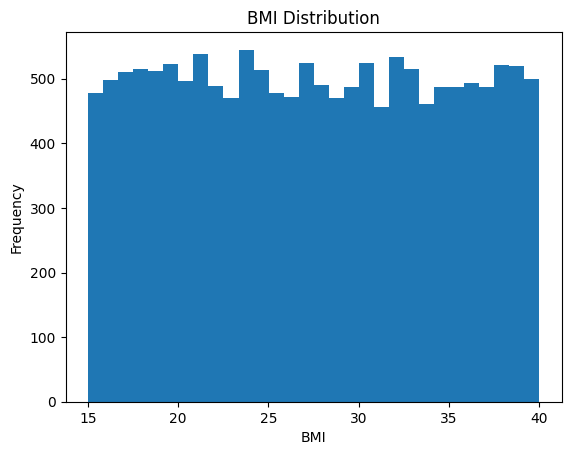

In [20]:
plt.hist(df['Body Mass Index (BMI)'], bins= 30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

Distribution Type: The distribution appears relatively uniform, suggesting a consistent number of people across the measured BMI range, rather than a typical bell-curve distribution often seen in natural populations.

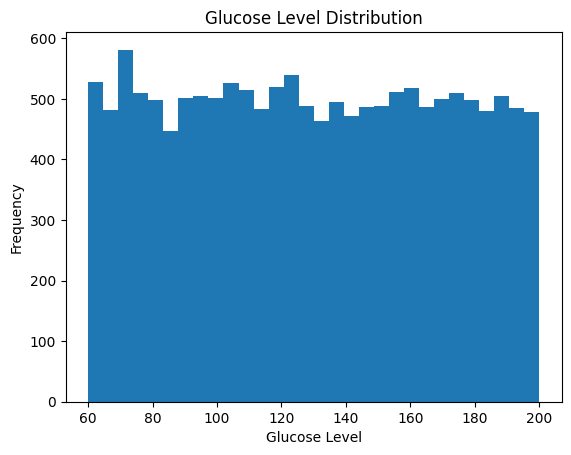

In [21]:
plt.hist(df['Average Glucose Level'], bins = 30)
plt.title('Glucose Level Distribution')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()

The distribution appears relatively uniform across the observed range.

###Bivariate Analysis (Feature vs Target)

Goal: Understand which features correlate with stroke.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15000 non-null  int64  
 1   Gender                    15000 non-null  object 
 2   Heart Disease             15000 non-null  int64  
 3   Marital Status            15000 non-null  object 
 4   Work Type                 15000 non-null  object 
 5   Residence Type            15000 non-null  object 
 6   Average Glucose Level     15000 non-null  float64
 7   Body Mass Index (BMI)     15000 non-null  float64
 8   Smoking Status            15000 non-null  object 
 9   Alcohol Intake            15000 non-null  object 
 10  Physical Activity         15000 non-null  object 
 11  Stroke History            15000 non-null  int64  
 12  Family History of Stroke  15000 non-null  object 
 13  Dietary Habits            15000 non-null  object 
 14  Stress

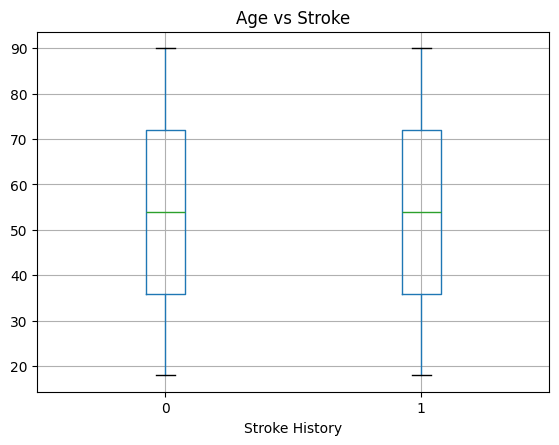

In [23]:
# Stroke vs Age
df.boxplot(column='Age', by='Stroke History')
plt.title("Age vs Stroke")
plt.suptitle("")
plt.show()


Comparison: The distributions of age appear very similar between those with a stroke history (1) and those without (0), suggesting age alone might not be a primary differentiating factor in this specific dataset.

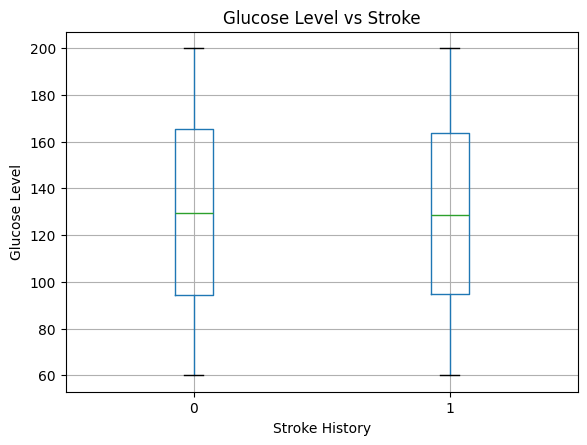

In [24]:
df.boxplot(column='Average Glucose Level', by='Stroke History')
plt.title('Glucose Level vs Stroke')
plt.suptitle('')
plt.ylabel('Glucose Level')
plt.xlabel('Stroke History')
plt.show()

Comparison: The distributions of glucose levels appear very similar for both groups, suggesting that based on this specific dataset, there is no significant difference in glucose levels between individuals with and without a history of stroke.

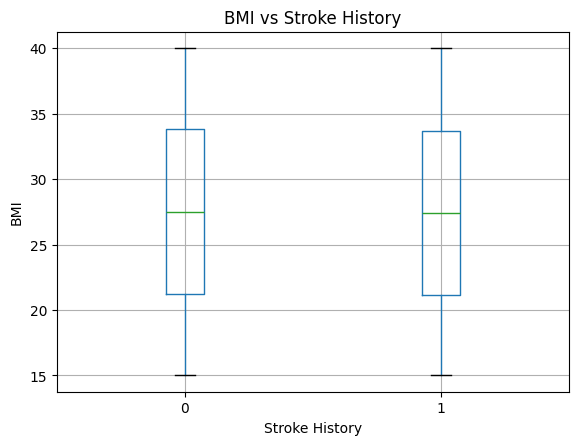

In [25]:
df.boxplot(column='Body Mass Index (BMI)', by='Stroke History')
plt.title('BMI vs Stroke History')
plt.suptitle('')
plt.xlabel('Stroke History')
plt.ylabel('BMI')
plt.show()

Median BMI: Both groups have the same median BMI, approximately 27.5. The median is the green line within the box.

Interquartile Range (IQR): The middle 50% of data (the box itself) for both groups falls between a BMI of approximately 21.5 and 34.

Data Distribution: The distributions appear very similar across minimum values (around 15), maximum values (around 40), and quartiles.

In [26]:
# # Hypertension vs Stroke
# pd.crosstab(df['Hypertension'], df['Stroke History']).plot(kind='bar')
# plt.title("Hypertension vs Stroke")
# plt.show()

The data suggests that among the individuals with hypertension, there are roughly equal numbers of people who have had a stroke and those who have not.

Hypertension is a major risk factor for stroke.

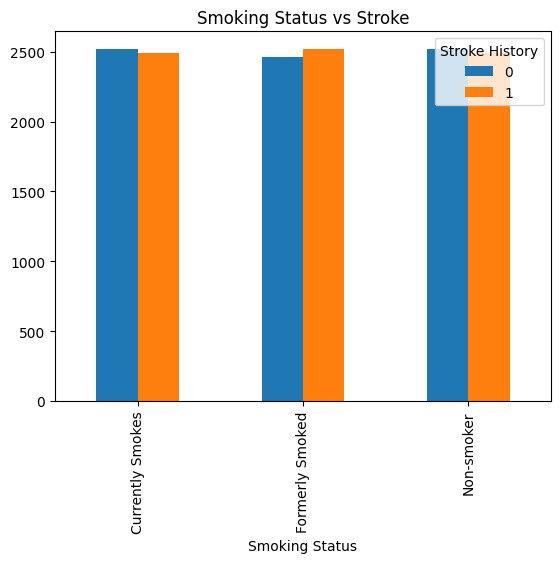

In [27]:
# Smoking Status vs Stroke
pd.crosstab(df['Smoking Status'], df['Stroke History']).plot(kind='bar')
plt.title("Smoking Status vs Stroke")
plt.show()

The data suggests a correlation between smoking status and stroke history, but it does not provide definitive evidence that one causes the other.

###Correlation Analysis

Goal: Identify important numerical relationships.

##Modelling Phase

###Feature Engineering & Preprocessing

In [28]:
df = df.reset_index(drop=True)

In [29]:
def calculate_stroke_risk(row):
    score = 0
    # Age contribution
    if row["Age"] > 65:
        score += 2
    elif row["Age"] > 50:
        score += 1

    # BMI contribution
    if row["Body Mass Index (BMI)"] >= 30:
        score += 1

    # Glucose contribution
    if row["Average Glucose Level"] > 140:
        score += 1

    # Blood pressure contribution
    if row["Systolic_BP"] > 140 or row["Diastolic_BP"] > 90:
        score += 1

    # Cholesterol contribution
    if row["LDL"] > 130 or row["HDL"] < 40:
        score += 1

    # Heart disease
    if row["Heart Disease"] == 1:
        score += 1

    # Stroke history
    if row["Stroke History"] == 1:
        score += 2

    # Family history
    if row["Family History of Stroke"] == 1:
        score += 1

    # Stress levels
    if row["Stress Levels"] > 7:
        score += 1

    # Symptoms
    if row["Symptoms"] == 1:
        score += 1

    return score

In [30]:
# Calculate risk scores
df["stroke_score"] = df.apply(calculate_stroke_risk, axis=1)

In [31]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Columns to encode (replace strings with numbers)
categorical_cols = ['Gender', 'Marital Status', 'Work Type', 'Residence Type',
                    'Smoking Status', 'Alcohol Intake', 'Physical Activity',
                    'Family History of Stroke', 'Dietary Habits']

encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Save encoders
joblib.dump(encoders, "encoders.pkl")

# Use the real stroke labels
df['Diagnosis'] = df['Diagnosis'].map({'Stroke': 1, 'No Stroke': 0})

# Encode symptoms
df['Symptoms'] = df['Symptoms'].apply(lambda x: 0 if x == 'None' else 1)

# Keep stroke_score if you want as a **feature**, but don't drop it yet
# It can help the model, but it should not replace Diagnosis
df['stroke_score'] = df.apply(calculate_stroke_risk, axis=1)


In [32]:
# # 8. Scale numeric features
# from sklearn.preprocessing import StandardScaler

# num_cols = ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels',
#             'Systolic_BP', 'Diastolic_BP', 'HDL', 'LDL']
# scaler = StandardScaler()
# df[num_cols] = scaler.fit_transform(df[num_cols])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15000 non-null  int64  
 1   Gender                    15000 non-null  int64  
 2   Heart Disease             15000 non-null  int64  
 3   Marital Status            15000 non-null  int64  
 4   Work Type                 15000 non-null  int64  
 5   Residence Type            15000 non-null  int64  
 6   Average Glucose Level     15000 non-null  float64
 7   Body Mass Index (BMI)     15000 non-null  float64
 8   Smoking Status            15000 non-null  int64  
 9   Alcohol Intake            15000 non-null  int64  
 10  Physical Activity         15000 non-null  int64  
 11  Stroke History            15000 non-null  int64  
 12  Family History of Stroke  15000 non-null  int64  
 13  Dietary Habits            15000 non-null  int64  
 14  Stress

In [34]:
df['Symptoms'].nunique()

2

In [35]:
# Check target distribution
print(df['Stroke History'].value_counts())  # or 'Diagnosis' if using that


Stroke History
1    7504
0    7496
Name: count, dtype: int64


In [36]:
# Check target distribution
print(df['Diagnosis'].value_counts())  # or 'Diagnosis' if using that


Diagnosis
0    7532
1    7468
Name: count, dtype: int64


In [37]:
#prepare the data
x = df.drop('Diagnosis', axis= 1)
y = df['Diagnosis']

In [38]:
from imblearn.over_sampling import SMOTE

# Assuming X and y are already prepared
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)

# Check new class distribution
print(pd.Series(y).value_counts())


Diagnosis
1    7532
0    7532
Name: count, dtype: int64


In [39]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


###Model

#####*i. Logistic Regression model*

In [42]:
from sklearn.linear_model import LogisticRegression

#create a logistic regression model
log_reg_model = LogisticRegression(class_weight='balanced')
log_reg_model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [43]:
#make predictions
training_predictions = log_reg_model.predict(x_train)
testing_predictions = log_reg_model.predict(x_test)

print('Training Predictions:', training_predictions)
print()
print('Testing predictions:', testing_predictions)

Training Predictions: [0 0 1 ... 1 0 1]

Testing predictions: [0 0 0 ... 0 0 0]


In [44]:
#check model accuracy
print('Model training accuracy', log_reg_model.score(x_train, y_train))
print()
print('Model testing accuracy', log_reg_model.score(x_test, y_test))

Model training accuracy 0.5207036760434819

Model testing accuracy 0.4925323597743113


In [45]:
from sklearn.metrics import classification_report

#evaluate the model
print(classification_report(y_test, testing_predictions))

              precision    recall  f1-score   support

           0       0.49      0.49      0.49      1507
           1       0.49      0.50      0.49      1506

    accuracy                           0.49      3013
   macro avg       0.49      0.49      0.49      3013
weighted avg       0.49      0.49      0.49      3013



#####*ii. KNN*

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors= 4)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [47]:
#make predictions
training_predictions = knn_model.predict(x_train)
testing_predictions = knn_model.predict(x_test)

print('Training Predictions:', training_predictions)
print()
print('Testing predictions:', testing_predictions)

Training Predictions: [0 0 0 ... 0 0 0]

Testing predictions: [0 0 1 ... 0 0 0]


In [48]:
#check model accuracy
print('Training model accuracy:', knn_model.score(x_train, y_train))
print()
print('Testing model accuracy:', knn_model.score(x_test, y_test))

Training model accuracy: 0.6877437557049207

Testing model accuracy: 0.49717889147029537


In [49]:
print(classification_report(y_test, testing_predictions))

              precision    recall  f1-score   support

           0       0.50      0.69      0.58      1507
           1       0.50      0.31      0.38      1506

    accuracy                           0.50      3013
   macro avg       0.50      0.50      0.48      3013
weighted avg       0.50      0.50      0.48      3013



#####*iii. Decision Tree*

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [51]:
#create a decision tree model
dec_tree_model = DecisionTreeClassifier(random_state= 42)
dec_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
#make some predictions
training_predictions = dec_tree_model.predict(x_train)
testing_predictions = dec_tree_model.predict(x_test)

print('Training predictions:', training_predictions)
print()
print('Testing predictions:', testing_predictions)

Training predictions: [1 0 1 ... 0 0 1]

Testing predictions: [0 0 0 ... 0 1 0]


In [53]:
#check model accuracy
print('Training model accuracy:', dec_tree_model.score(x_train, y_train))
print()
print('Testing model accuracy:', dec_tree_model.score(x_test, y_test))

Training model accuracy: 1.0

Testing model accuracy: 0.4975107865914371


In [54]:
print(classification_report(y_test, testing_predictions))

              precision    recall  f1-score   support

           0       0.50      0.51      0.50      1507
           1       0.50      0.48      0.49      1506

    accuracy                           0.50      3013
   macro avg       0.50      0.50      0.50      3013
weighted avg       0.50      0.50      0.50      3013



#####*iv. Random Forest and Gradient Boosting Classifier*

In [55]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

rand_forest_model = RandomForestClassifier(random_state=42, class_weight='balanced_subsample', n_estimators=500)
rand_forest_model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=500,
                       random_state=42)

In [56]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

In [57]:
grid_rf = GridSearchCV(rand_forest_model, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_rf.fit(x_train, y_train)

best_rf = grid_rf.best_estimator_
print("Best RF parameters:", grid_rf.best_params_)

Best RF parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1507
           1       0.50      0.50      0.50      1506

    accuracy                           0.50      3013
   macro avg       0.50      0.50      0.50      3013
weighted avg       0.50      0.50      0.50      3013



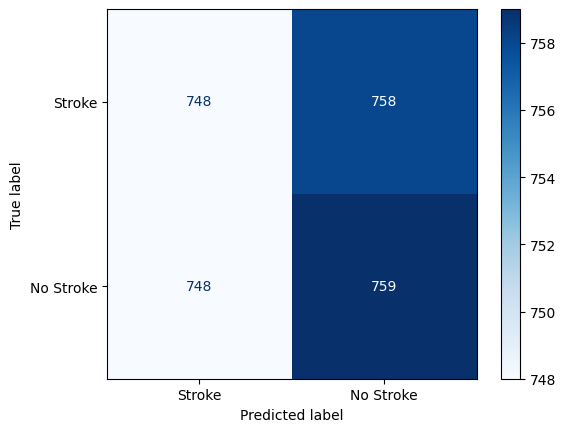

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = best_rf.predict(x_test)

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])  # 1 = Stroke, 0 = No Stroke
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stroke','No Stroke'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


#####*v. Neural Network*

In [59]:
#Build the neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,        # stop if val_loss doesn't improve for 5 epochs
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True
)


# model = Sequential([
#     Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
#     Dropout(0.4),

#     Dense(32, activation='relu'),
#     Dropout(0.3),

#     Dense(1, activation='sigmoid')  # Binary classification
# ])

model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
#train the model
history = model.fit(
    x_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5002 - loss: 0.7254 - val_accuracy: 0.5085 - val_loss: 0.6931
Epoch 2/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5027 - loss: 0.6963 - val_accuracy: 0.5106 - val_loss: 0.6935
Epoch 3/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5027 - loss: 0.6928 - val_accuracy: 0.5064 - val_loss: 0.6932
Epoch 4/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5125 - loss: 0.6936 - val_accuracy: 0.5060 - val_loss: 0.6940
Epoch 5/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5190 - loss: 0.6914 - val_accuracy: 0.5064 - val_loss: 0.6939
Epoch 6/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5243 - loss: 0.6906 - val_accuracy: 0.4961 - val_loss: 0.6938


In [61]:
#evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

# Predictions & metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(x_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4983 - loss: 0.6949
Test Accuracy: 0.4948556125164032
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.49      0.26      0.34      1507
           1       0.50      0.73      0.59      1506

    accuracy                           0.49      3013
   macro avg       0.49      0.49      0.47      3013
weighted avg       0.49      0.49      0.47      3013

[[ 397 1110]
 [ 412 1094]]


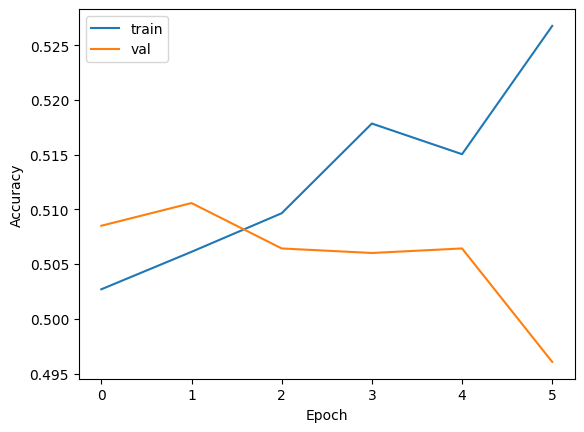

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


| Model                             | Accuracy | F1-score (Stroke=1) | Notes                                                                 |
| --------------------------------- | -------- | ------------------- | --------------------------------------------------------------------- |
| Logistic Regression               | 0.49     | 0.49                | Baseline linear model, performs like random guessing.                 |
| KNN                               | 0.50     | 0.38                | Overpredicts non-stroke; poor recall for stroke cases.                |
| Decision Tree                     | 0.50     | 0.49                | Random-like predictions; likely underfitting.                         |
| Random Forest / Gradient Boosting | 0.50     | 0.50                | Balanced predictions but still essentially random.                    |
| Deep Neural Network               | 0.49     | 0.40                | Slightly better precision for non-stroke, recall for stroke very low. |


Rando Forest/Gradient Boosting had the best performance from the above models so I decided to proceed with that.


#####*vi. XGBoost*

In [63]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.4958513109857285
              precision    recall  f1-score   support

           0       0.50      0.49      0.49      1507
           1       0.50      0.50      0.50      1506

    accuracy                           0.50      3013
   macro avg       0.50      0.50      0.50      3013
weighted avg       0.50      0.50      0.50      3013

[[739 768]
 [751 755]]


Save the trained RF model

In [64]:
import joblib


joblib.dump(best_rf, 'stroke_rf_model.pkl',  compress=3)
print("Model saved as stroke_rf_model.pkl")


Model saved as stroke_rf_model.pkl


###Build API

i.  Install FastAPI and Uvicorn

In [65]:
!pip install fastapi uvicorn nest-asyncio pyngrok


ii. Create a FastAPI app

In [66]:
app_code = """
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import joblib
import numpy as np

# Load model + encoders
model = joblib.load("stroke_rf_model.pkl")
encoders = joblib.load("encoders.pkl")

app = FastAPI()

class PatientData(BaseModel):
    age: int
    gender: str
    heart_disease: int
    marital_status: str
    work_type: str
    residence_type: str
    avg_glucose_level: float
    bmi: float
    smoking_status: str
    alcohol_intake: str
    physical_activity: str
    stroke_history: int
    family_history_stroke: str
    dietary_habits: str
    stress_levels: float
    symptoms: int
    systolic_bp: int
    diastolic_bp: int
    hdl: int
    ldl: int
    stroke_score: float


def transform_with_encoder(encoder, value, col_name):
    try:
        return encoder.transform([value])[0]
    except ValueError:
        # handle unseen label
        return -1  # or some default/fallback integer

def preprocess(data: PatientData):
    # Normalize strings
    gender_val = data.gender.strip().title()
    marital_val = data.marital_status.strip().title()
    work_val = data.work_type.strip().title()
    residence_val = data.residence_type.strip().title()
    smoking_val = data.smoking_status.strip().lower()  # match encoder
    alcohol_val = data.alcohol_intake.strip().title()
    physical_val = data.physical_activity.strip().title()
    family_val = data.family_history_stroke.strip().title()
    diet_val = data.dietary_habits.strip().title()

    # Apply encoders safely
    gender = transform_with_encoder(encoders["Gender"], gender_val, "Gender")
    marital = transform_with_encoder(encoders["Marital Status"], marital_val, "Marital Status")
    work = transform_with_encoder(encoders["Work Type"], work_val, "Work Type")
    residence = transform_with_encoder(encoders["Residence Type"], residence_val, "Residence Type")
    smoking = transform_with_encoder(encoders["Smoking Status"], smoking_val, "Smoking Status")
    alcohol = transform_with_encoder(encoders["Alcohol Intake"], alcohol_val, "Alcohol Intake")
    physical = transform_with_encoder(encoders["Physical Activity"], physical_val, "Physical Activity")
    family = transform_with_encoder(encoders["Family History of Stroke"], family_val, "Family History of Stroke")
    diet = transform_with_encoder(encoders["Dietary Habits"], diet_val, "Dietary Habits")

    arr = np.array([
    data.age,
    gender,
    data.heart_disease,
    marital,
    work,
    residence,
    data.avg_glucose_level,
    data.bmi,
    smoking,
    alcohol,
    physical,
    data.stroke_history,
    family,
    diet,
    data.stress_levels,
    data.symptoms,
    data.systolic_bp,
    data.diastolic_bp,
    data.hdl,
    data.ldl,
    data.stroke_score
    ]).reshape(1, -1)


    return arr

@app.get("/")
def root():
    return {"message": "Stroke Prediction API is running"}

@app.post("/predict")
def predict(data: PatientData):
    X = preprocess(data)
    try:
        prediction = int(model.predict(X)[0])
        probability = float(model.predict_proba(X)[0][1])
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))
    return {"prediction": prediction, "probability": probability}


"""

# Write the code into app.py
with open("app.py", "w", encoding="utf-8") as f:
    f.write(app_code)

print("app.py file has been created successfully!")

app.py file has been created successfully!


In [67]:
app_code = """import streamlit as st
import requests

API_URL = "https://stroke-prediction-api-aksd.onrender.com/predict"

st.set_page_config(page_title="Stroke Risk Predictor", page_icon="🩺", layout="centered")
st.title("Stroke Risk Prediction System")
st.write("Enter your health details below. The system will predict your stroke risk using a machine learning model.")

with st.form("input_form"):
    age = st.number_input("Age", 1, 120)
    gender = st.selectbox("Gender", ["Male", "Female"])
    heart_disease = st.selectbox("Heart Disease?", [0, 1], format_func=lambda x: "Yes" if x==1 else "No")
    marital_status = st.selectbox("Marital Status", ["Single", "Married"])
    work_type = st.selectbox("Work Type", ["Private","Self-employed","Govt","Children","Never-worked"])
    residence_type = st.selectbox("Residence Type", ["Rural", "Urban"])
    avg_glucose_level = st.number_input("Average Glucose Level", 50.0, 300.0)
    bmi = st.number_input("Body Mass Index (BMI)", 10.0, 60.0)
    smoking_status = st.selectbox("Smoking Status", ["never smoked", "formerly smoked", "smokes"])
    alcohol_intake = st.selectbox("Alcohol Intake", ["No", "Yes"])
    physical_activity = st.selectbox("Physical Activity", ["No", "Yes"])
    stroke_history = st.selectbox("Stroke History", [0, 1], format_func=lambda x: "Yes" if x==1 else "No")
    family_history_stroke = st.selectbox("Family History of Stroke", ["No", "Yes"])
    dietary_habits = st.selectbox("Dietary Habits", ["No", "Yes"])
    stress_levels = st.number_input("Stress Levels (0-10)", 0.0, 10.0, step=0.1)
    symptoms = st.selectbox("Symptoms Present?", [0, 1], format_func=lambda x: "Yes" if x==1 else "No")
    systolic_bp = st.number_input("Systolic BP", 80, 200)
    diastolic_bp = st.number_input("Diastolic BP", 50, 130)
    hdl = st.number_input("HDL", 20, 100)
    ldl = st.number_input("LDL", 20, 200)
    submitted = st.form_submit_button("Predict Stroke Risk")

if submitted:
    stroke_score = (
        age*0.3 +
        avg_glucose_level*0.4 +
        bmi*0.2  # example weighting
    )

    data = {
        "age": int(age),
        "gender": gender,
        "heart_disease": int(heart_disease),
        "marital_status": marital_status,
        "work_type": work_type,
        "residence_type": residence_type,
        "avg_glucose_level": float(avg_glucose_level),
        "bmi": float(bmi),
        "smoking_status": smoking_status,
        "alcohol_intake": alcohol_intake,
        "physical_activity": physical_activity,
        "stroke_history": int(stroke_history),
        "family_history_stroke": family_history_stroke,
        "dietary_habits": dietary_habits,
        "stress_levels": float(stress_levels),
        "symptoms": int(symptoms),
        "systolic_bp": int(systolic_bp),
        "diastolic_bp": int(diastolic_bp),
        "hdl": int(hdl),
        "ldl": int(ldl),
        "stroke_score": float(stroke_score)  # include this
    }


    try:
        response = requests.post(API_URL, json=data)
        if response.status_code == 200:
            result = response.json()
            prediction = result["prediction"]
            probability = result["probability"]

            if prediction == 1:
                st.error(f"⚠️ High Stroke Risk (Probability: {probability:.2f})")
            else:
                st.success(f"🟢 Low Stroke Risk (Probability: {probability:.2f})")
        else:
            st.error(f"API Error: {response.status_code} - {response.text}")
    except Exception as e:
        st.error(f"Error: {e}")


"""

# Write the code into s_app.py
with open("s_app.py", "w", encoding="utf-8") as f:
    f.write(app_code)

print("s_app.py file has been created successfully!")

s_app.py file has been created successfully!


In [68]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df.describe(include = 'all')


,Age,Gender,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Symptoms,Diagnosis,Systolic_BP,Diastolic_BP,HDL,LDL,stroke_score
count,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04
mean,1.193712e-16,1.515825e-17,5.305386e-17,-1.132131e-16,-2.463215e-17,7.815970e-17,-1.534772e-16,-2.150576e-16,-4.452734e-17,-7.673862e-17,1.018445e-17,-1.989520e-17,3.221127e-17,4.357995e-17,-1.487403e-16,-7.484383e-17,-6.110668e-17,4.225361e-16,4.215887e-17,-1.762146e-16,8.692306e-17,-9.592327e-18
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-1.710900e+00,-1.016401e+00,-1.005884e+00,-1.230900e+00,-1.358900e+00,-9.961408e-01,-1.715271e+00,-1.723979e+00,-1.223359e+00,-1.351598e+00,-1.216176e+00,-1.000533e+00,-1.012343e+00,-1.516532e+00,-1.748163e+00,-2.236068e+00,-9.957424e-01,-1.708546e+00,-1.695636e+00,-1.688452e+00,-1.730536e+00,-3.215120e+00
25%,-8.562965e-01,-1.016401e+00,-1.005884e+00,-1.230900e+00,-4.673505e-01,-9.961408e-01,-8.627013e-01,-8.733523e-01,-1.223359e+00,-4.547576e-01,-1.216176e+00,-1.000533e+00,-1.012343e+00,-1.015122e+00,-8.641086e-01,4.472136e-01,-9.957424e-01,-8.741558e-01,-8.783852e-01,-8.800948e-01,-8.792904e-01,-5.746391e-01
50%,-1.693380e-03,9.838635e-01,9.941504e-01,-1.427506e-02,4.241995e-01,-9.961408e-01,-1.346645e-02,-7.510692e-03,1.631363e-04,4.420823e-01,5.047726e-03,9.994668e-01,9.878077e-01,-1.230126e-02,9.503930e-03,4.472136e-01,-9.957424e-01,-1.838188e-03,6.969330e-03,-4.374113e-03,-1.443570e-03,-4.654288e-02
75%,8.529097e-01,9.838635e-01,9.941504e-01,1.202349e+00,1.315749e+00,1.003874e+00,8.681250e-01,8.638635e-01,1.223685e+00,4.420823e-01,1.226272e+00,9.994668e-01,9.878077e-01,9.905192e-01,8.691944e-01,4.472136e-01,1.004276e+00,8.704794e-01,8.923239e-01,8.713466e-01,8.764033e-01,4.815534e-01
max,1.707513e+00,9.838635e-01,9.941504e-01,1.202349e+00,1.315749e+00,1.003874e+00,1.742677e+00,1.732471e+00,1.223685e+00,1.338922e+00,1.226272e+00,9.994668e-01,9.878077e-01,1.491929e+00,1.732365e+00,4.472136e-01,1.004276e+00,1.704870e+00,1.709574e+00,1.679704e+00,1.727649e+00,3.122035e+00


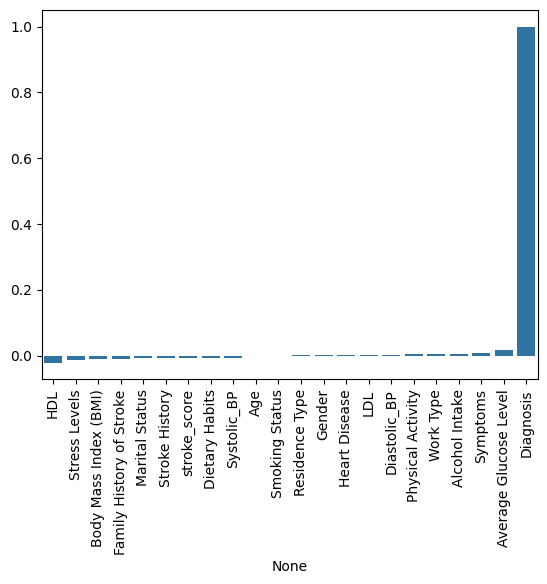

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()['Diagnosis'].sort_values()
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=90)
plt.show()


In [70]:
print(corr)

HDL                        -0.021493
Stress Levels              -0.012749
Body Mass Index (BMI)      -0.010184
Family History of Stroke   -0.009282
Marital Status             -0.008537
Stroke History             -0.008264
stroke_score               -0.007406
Dietary Habits             -0.006566
Systolic_BP                -0.006149
Age                        -0.002060
Smoking Status             -0.001469
Residence Type              0.000384
Gender                      0.001136
Heart Disease               0.001892
LDL                         0.002560
Diastolic_BP                0.003053
Physical Activity           0.003886
Work Type                   0.004788
Alcohol Intake              0.005647
Symptoms                    0.009183
Average Glucose Level       0.015627
Diagnosis                   1.000000
Name: Diagnosis, dtype: float64


In [71]:
for col in df.columns:
    print(col, df[col].nunique())


Age 73
Gender 2
Heart Disease 2
Marital Status 3
Work Type 4
Residence Type 2
Average Glucose Level 9215
Body Mass Index (BMI) 2490
Smoking Status 3
Alcohol Intake 4
Physical Activity 3
Stroke History 2
Family History of Stroke 2
Dietary Habits 7
Stress Levels 1001
Symptoms 2
Diagnosis 2
Systolic_BP 91
Diastolic_BP 51
HDL 51
LDL 131
stroke_score 13


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15000 non-null  float64
 1   Gender                    15000 non-null  float64
 2   Heart Disease             15000 non-null  float64
 3   Marital Status            15000 non-null  float64
 4   Work Type                 15000 non-null  float64
 5   Residence Type            15000 non-null  float64
 6   Average Glucose Level     15000 non-null  float64
 7   Body Mass Index (BMI)     15000 non-null  float64
 8   Smoking Status            15000 non-null  float64
 9   Alcohol Intake            15000 non-null  float64
 10  Physical Activity         15000 non-null  float64
 11  Stroke History            15000 non-null  float64
 12  Family History of Stroke  15000 non-null  float64
 13  Dietary Habits            15000 non-null  float64
 14  Stress